## 2.3. Содержание ноутбука `HW02.ipynb` (основная часть)

### 2.3.1. Загрузка данных и первичный осмотр

#### 1. Импортировать необходимые библиотеки:

In [4]:
!pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 2. Загрузить учебный датасет

In [6]:
data = pd.read_csv('S02-hw-dataset.csv')

#### 3. Вывести:

##### - первые строки датасета

In [7]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


##### - информацию о столбцах и типах

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


##### - базовые описательные статистики

In [9]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### 2.3.2. Пропуски, дубликаты и базовый контроль качества

#### 1. Посчитать долю пропусков в каждом столбце 

In [18]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

#### 2. Проверить наличие полностью дублирующих строк

In [17]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

#### 3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета.

In [22]:
data[(data['purchases'] < 0) | (data['revenue'] < 0) | (data['age'] < 0)] # Проверка на отрицательные значения

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [23]:
data[(data['age'] <=0) | (data['age'] > 100)] # Проверка строк на нереалистичные значения по возрасту

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [24]:
data[(data['purchases'] > 0) & (data['revenue'] <= 0)] # Покупки при нулевом или отрицательном доходе

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


#### 4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

##### В полученных данных были обнаруженны недопустимые значения в столбцах age и purchases, а так же нулевое значение revenue при purchases > 0.

### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

#### 1. Посчитать частоты для одной или двух категориальных переменных

In [32]:
data['country'].value_counts() # Частоты по столбцу country

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [33]:
data['age'].value_counts() # Частоты по столбцу age

age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64

#### 2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`

In [36]:
age_group = data.groupby('country') # Группировка и вывод среднего размера выручки по странам
age_group['revenue'].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

#### 3. При необходимости ввести дополнительные «коридоры» (bins) или группировки

In [41]:
age_cut = pd.cut(data['age'],
                   [0, 13, 18, 30, 70, 100],
                   labels=['Ребёнок', 'Подросток', 'Молодой', 'Взрослый', 'Пожилой'], 
                   include_lowest=True,
) 
age_cut.value_counts() # Создание группы по возрасту

age
Взрослый     23
Молодой      13
Ребёнок       1
Подросток     1
Пожилой       0
Name: count, dtype: int64

In [42]:
revenue_cut = pd.cut(data['revenue'],
                       3,
                       labels=['Малая выручка', 'Средняя выручка', 'Большая выручка'],
                       include_lowest=True
)
revenue_cut.value_counts()

revenue
Малая выручка      25
Средняя выручка    12
Большая выручка     4
Name: count, dtype: int64

#### 4. Кратко (1-2 абзаца) описать текстом основные наблюдения

##### По полученным данным можно сделать вывод, что большинство людей в исследуемых данных - взрослые (23), большинство людей имеют малую выручку (25). Самая большая выручка у людей из Германии, самая малая - у людей из США.

## 2.4. Визуализация данных в Matplotlib

### 1. Гистограмма для количественного признака

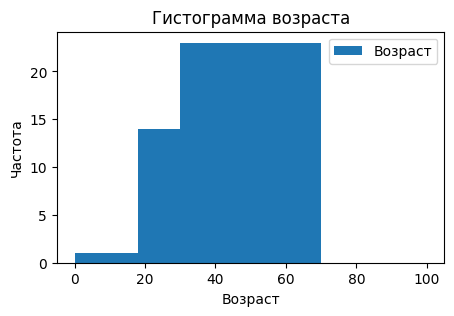

In [76]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(data['age'].to_numpy(),
        bins=np.array([0, 18, 30, 70, 100]),
        label=('Возраст')
)
ax.legend()
ax.set_title('Гистограмма возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.show()

##### По данной гистограмме можно сделать вывод, что в используемых данных большинство людей в возрасте от 30 до 70 лет

### 2. Один боксплот (boxplot)

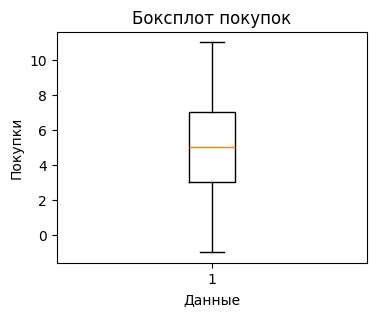

In [69]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(data['purchases'].to_numpy())
ax.set_title('Боксплот покупок')
ax.set_xlabel('Данные')
ax.set_ylabel('Покупки')
plt.show()

##### По данной диаграмме можно увидеть, что медианное значение покупок среди всех возрастов - 5

### 3. Один scatter (диаграмма рассеяния)

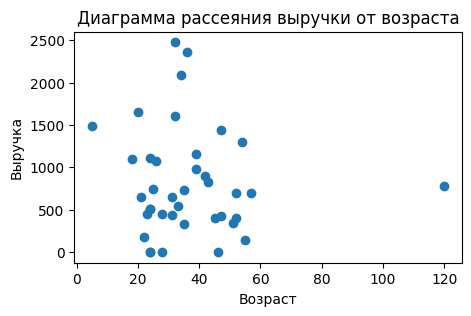

In [70]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(data['age'].to_numpy(), data['revenue'].to_numpy())
ax.set_title('Диаграмма рассеяния выручки от возраста') # Название диаграммы
ax.set_xlabel('Возраст') # Подпись оси x 
ax.set_ylabel('Выручка') # Подпись оси y
plt.savefig('scatter.png')
plt.show() # Вывод

##### По данной диаграмме можно увидеть, что большинство выручи приходится на людей возрастом от 20 до 60 лет. Максимальная доля выручки приходится на людей от 35 до 40 лет.